## Data Loading and Cleaning

In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
import re
import matplotlib.dates as mdates
!pip install pywaffle
from pywaffle import Waffle
!pip install mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df = pd.read_excel('C:/Users/ANKIT/Desktop/Virtual Internship/QVI_transaction_data.xlsx')

In [3]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
df.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [5]:
#Summarize Data
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [6]:
#Check for missing Values
df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

## Removing Outliers

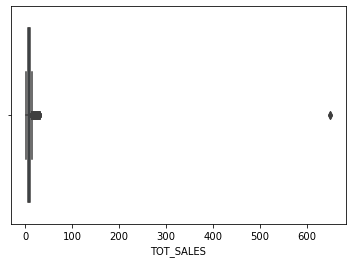

In [7]:
sns.boxplot(df.TOT_SALES)

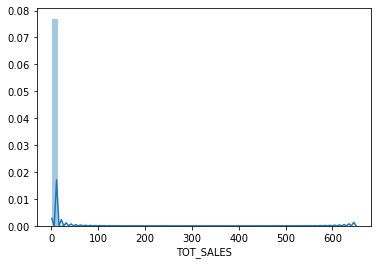

In [8]:
sns.distplot(df.TOT_SALES, kde=True)

In [9]:
numericdata = df.select_dtypes(['float64','int64'])

In [10]:
numericdata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,2,6.0
1,43599,1,1307,348,66,3,6.3
2,43605,1,1343,383,61,2,2.9
3,43329,2,2373,974,69,5,15.0
4,43330,2,2426,1038,108,3,13.8


In [11]:
a = numericdata[numericdata['TOT_SALES']<8.000]

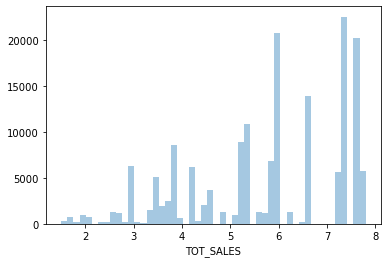

In [12]:
sns.distplot(a.TOT_SALES, kde=False)

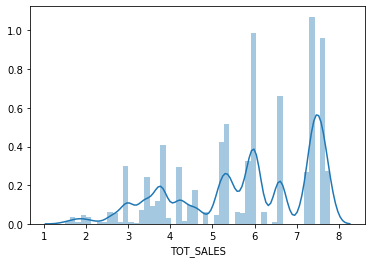

In [13]:
sns.distplot(a.TOT_SALES, kde=True)

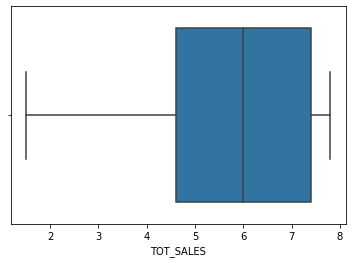

In [14]:
sns.boxplot(a.TOT_SALES)

## Fixing Date

In [15]:
df['DATE'] = pd.TimedeltaIndex(df['DATE'], unit='d') + dt.datetime(1899, 12, 30)

In [16]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [17]:
df.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

## Product Name

In [18]:
# Extract product size
df['PROD_SIZE'] = [re.search(r"[0-9]+(g|G)", p).group(0).replace('G','').replace('g','') 
for p in df['PROD_NAME']]

In [19]:
# unique product names
df['PROD_NAME'].unique()[:10]

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G'], dtype=object)

In [20]:
# Remove salsa dips
df = df[~df['PROD_NAME'].isin(['Old El Paso Salsa   Dip Tomato Mild 300g',
'Old El Paso Salsa   Dip Chnky Tom Ht300g',
'Woolworths Mild     Salsa 300g',
'Old El Paso Salsa   Dip Tomato Med 300g',
'Woolworths Medium   Salsa 300g',
'Doritos Salsa Mild  300g',
'Doritos Salsa       Medium 300g'])].reset_index(drop=True)

In [21]:
# replace & with space and remove multiple spaces
df['PROD_NAME'] = [" ".join(p.replace('&',' ').split()) for p in df['PROD_NAME']]
# remove digits that are followed by grams
df['PROD_NAME'] = [re.sub(r"\s*[0-9]+(g|G)", r"", p) for p in df['PROD_NAME']]

## Product Brand

In [22]:
def replaceBrands(string):
    # specific
    string = re.sub(r"Red Rock Deli", "RRD", string)
    string = re.sub(r"Dorito", "Doritos", string)
    string = re.sub(r"Doritoss", "Doritos", string)
    string = re.sub(r"Smith", "Smiths", string)
    string = re.sub(r"Smithss", "Smiths", string)
    string = re.sub(r"GrnWves", "Grain Waves", string)
    string = re.sub(r"Woolworths", "WW", string) 
    string = re.sub(r"Snbts", "Sunbites", string) 

    return string

# standardize common brand names
df['PROD_NAME'] = [replaceBrands(s) for s in df['PROD_NAME']]

# get brand name from first word
df['Brand'] = [s.split(' ')[0] for s in df['PROD_NAME']]

In [23]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,Brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150,Kettle


# Exploratory Data Analysis

## By Brand

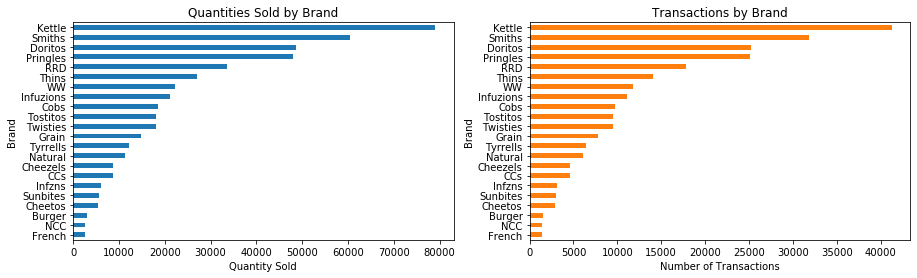

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

# Product quantity sales by brand
ax1=plt.subplot(121)
df.groupby(['Brand'], as_index=False).agg({'PROD_QTY': 'sum'}).sort_values('PROD_QTY').plot.barh(x='Brand',legend=False, ax=ax1)

ax1.set_xlabel('Quantity Sold')
ax1.set_ylabel('Brand')
ax1.set_title('Quantities Sold by Brand')

ax2=plt.subplot(122)
df.groupby(['Brand'], as_index=False)[['TXN_ID']].count().sort_values('TXN_ID').plot.barh(x='Brand',color='#ff7f0e', legend=False, ax=ax2)
ax2.set_xlabel('Number of Transactions')
ax2.set_ylabel('Brand')
ax2.set_title('Transactions by Brand')

plt.show()

## By Date

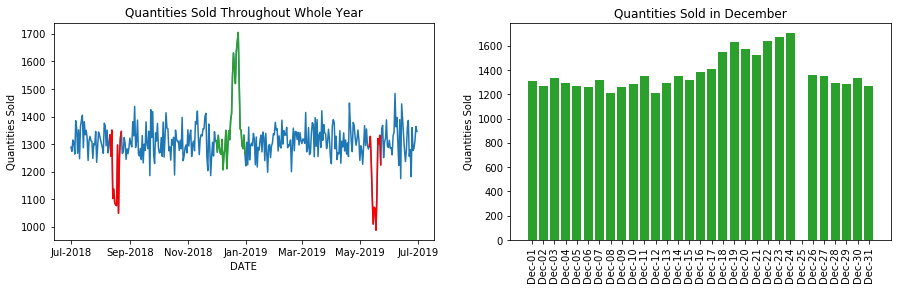

In [25]:
## Plot quantities sold by date
bydate = df.groupby('DATE').agg({'PROD_QTY': 'sum'}).reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

ax1=plt.subplot(121)
sns.lineplot(x="DATE", y="PROD_QTY", data=bydate, ax=ax1)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
sns.lineplot(x="DATE", y="PROD_QTY", data=bydate[(bydate['DATE'] > '2018-11-30') & (bydate['DATE'] < '2019-01-01')], color='#2ca02c', ax=ax1)
sns.lineplot(x="DATE", y="PROD_QTY", data=bydate[(bydate['DATE'] > '2018-08-10') & (bydate['DATE'] < '2018-08-24')], color='red', ax=ax1)
sns.lineplot(x="DATE", y="PROD_QTY", data=bydate[(bydate['DATE'] > '2019-05-10') & (bydate['DATE'] < '2019-05-24')], color='red', ax=ax1)
plt.ylabel('Quantities Sold')
plt.title('Quantities Sold Throughout Whole Year')

## Plot December quantities sold
# filter december
december = bydate[bydate['DATE'].isin(pd.date_range(start="2018-12-01",end="2018-12-31").tolist())]

# fill in missing dec data
december = december.set_index('DATE').reindex(pd.date_range(start="2018-12-01",end="2018-12-31"), fill_value=0)

ax2=plt.subplot(122)
ax2.bar(december.index,december['PROD_QTY'],color='#2ca02c')
ax2.set_xticks(december.index)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))
ax2.xaxis.set_minor_formatter(mdates.DateFormatter("%b-%d"))
ax2.tick_params(axis='x', rotation=90) 
plt.ylabel('Quantities Sold')
plt.title('Quantities Sold in December')
plt.show()



## By Product Size

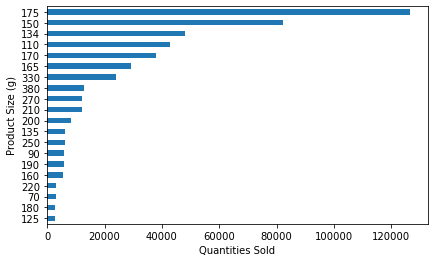

In [26]:
# Product Size

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,4))

ax1=plt.subplot(121)
df.groupby('PROD_SIZE').agg({'PROD_QTY': 'sum'}).sort_values('PROD_QTY').reset_index().plot.barh(x='PROD_SIZE', legend=False, ax=ax1)
ax1.set_ylabel('Product Size (g)')
ax1.set_xlabel('Quantities Sold')

plt.show()

In [27]:
customer =pd.read_csv('C:/Users/ANKIT/Desktop/Virtual Internship/QVI_purchase_behaviour.csv')

In [28]:
customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [29]:
customer.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

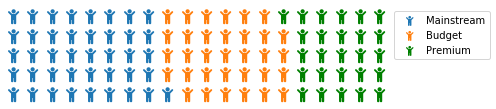

In [30]:
premium = dict(customer['PREMIUM_CUSTOMER'].value_counts()/len(customer)*100)

plt.figure(figsize=(7,5),
    FigureClass=Waffle, 
    rows=5, 
    values=premium, 
    colors=["#1f77b4", "#ff7f0e", "green"],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', 
    font_size=15, 
    icon_legend=True)
    
plt.show()

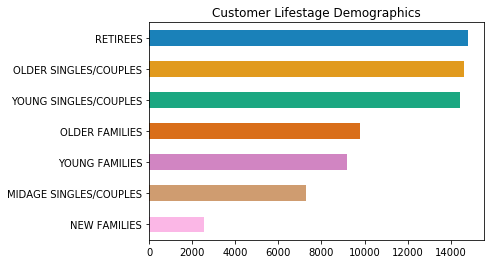

In [31]:
# Plot customer lifestage counts
customer.LIFESTAGE.value_counts().plot(kind='barh', alpha=.9, color=sns.color_palette("colorblind"), title='Customer Lifestage Demographics').invert_yaxis()

## Merge Data

In [32]:
# Merge
alldat = df.merge(customer, on='LYLTY_CARD_NBR')

print('No Duplicates:', len(alldat) == len(alldat)) # check same rows, no duplicates
print('Number of Nulls:', alldat.isnull().sum().sum()) # check for nulls

No Duplicates: True
Number of Nulls: 0


In [33]:
alldat.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,Brand,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,WW,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


## Total Sales and Quantity

In [34]:
# Sum up for each group 
life_prem = alldat.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'TOT_SALES':'sum','PROD_QTY':'sum', 'TXN_ID':'count'}).reset_index().sort_values('TOT_SALES') # sort by TOT_SALES
life_prem['Group'] = life_prem['LIFESTAGE'] + '_' + life_prem['PREMIUM_CUSTOMER']

# sort by PROD_QTY
life_prem_qty = life_prem.sort_values('PROD_QTY')

In [35]:
total_sales = sum(alldat['TOT_SALES'])
print(total_sales)

1821084.3999999582


In [36]:
alldat.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,Brand,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,WW,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [37]:
Total_customers = 241584

In [38]:
avg_turn = Total_customers / alldat.shape[0]

In [39]:
avg_turn

0.9676132494893259

In [40]:
life_prem_qty['Group'].unique()

array(['NEW FAMILIES_Premium', 'NEW FAMILIES_Mainstream',
       'NEW FAMILIES_Budget', 'MIDAGE SINGLES/COUPLES_Budget',
       'YOUNG SINGLES/COUPLES_Premium', 'MIDAGE SINGLES/COUPLES_Premium',
       'YOUNG SINGLES/COUPLES_Budget', 'OLDER FAMILIES_Premium',
       'YOUNG FAMILIES_Premium', 'MIDAGE SINGLES/COUPLES_Mainstream',
       'RETIREES_Premium', 'YOUNG FAMILIES_Mainstream',
       'OLDER FAMILIES_Mainstream', 'RETIREES_Budget',
       'OLDER SINGLES/COUPLES_Premium',
       'OLDER SINGLES/COUPLES_Mainstream', 'OLDER SINGLES/COUPLES_Budget',
       'YOUNG FAMILIES_Budget', 'YOUNG SINGLES/COUPLES_Mainstream',
       'RETIREES_Mainstream', 'OLDER FAMILIES_Budget'], dtype=object)

In [41]:
life_prem_qty.head()

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,PROD_QTY,TXN_ID,Group
5,NEW FAMILIES,Premium,10861.70,2807,1508,NEW FAMILIES_Premium
4,NEW FAMILIES,Mainstream,16078.00,4097,2207,NEW FAMILIES_Mainstream
3,NEW FAMILIES,Budget,20716.05,5282,2847,NEW FAMILIES_Budget
0,MIDAGE SINGLES/COUPLES,Budget,33705.40,9019,4766,MIDAGE SINGLES/COUPLES_Budget
20,YOUNG SINGLES/COUPLES,Premium,39347.90,10687,5917,YOUNG SINGLES/COUPLES_Premium


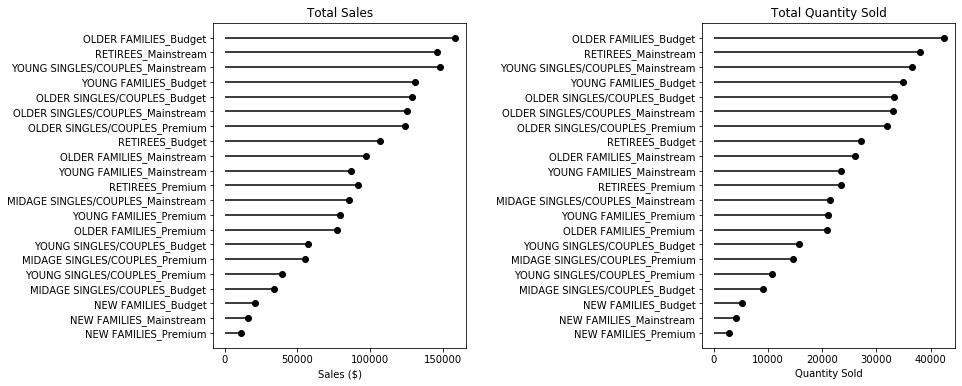

In [42]:
fig = plt.figure(figsize=(14,6))
ax1 = plt.subplot(121)
ax1.hlines(life_prem_qty['Group'], xmin=0, xmax=life_prem_qty.TOT_SALES)
ax1.plot(life_prem_qty.TOT_SALES, life_prem_qty['Group'], "o", color='black')
plt.xticks(ticks=[0,50000,100000,150000])
plt.title('Total Sales')
plt.xlabel('Sales ($)')

ax2 = plt.subplot(122)
ax2.hlines(life_prem_qty['Group'], xmin=0, xmax=life_prem_qty.PROD_QTY)
ax2.plot(life_prem_qty.PROD_QTY, life_prem_qty['Group'], "o", color='black')
plt.xlabel('Quantity Sold')
plt.title('Total Quantity Sold')

fig.tight_layout(pad=3.0)
plt.show()

## Total Sales per Customer and per Unique Customer

In [43]:
# Get number of unique customers in each group
life_prem_pc = alldat[['LYLTY_CARD_NBR','LIFESTAGE','PREMIUM_CUSTOMER']].drop_duplicates('LYLTY_CARD_NBR').reset_index(drop=True).groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).size().reset_index(name='Count').sort_values('Count').merge(life_prem, on=['LIFESTAGE','PREMIUM_CUSTOMER'])

life_prem_pc['SALES_PER_C'] = life_prem_pc['TOT_SALES']/life_prem_pc['TXN_ID']
life_prem_pc['SALES_PER_UC'] = life_prem_pc['TOT_SALES']/life_prem_pc['Count']
life_prem_pc = life_prem_pc.sort_values('SALES_PER_C')

In [44]:
life_prem_pc.head()

,LIFESTAGE,PREMIUM_CUSTOMER,Count,TOT_SALES,PROD_QTY,TXN_ID,Group,SALES_PER_C,SALES_PER_UC
11,YOUNG SINGLES/COUPLES,Budget,3675,57622.40,15689,8687,YOUNG SINGLES/COUPLES_Budget,6.633176,15.679565
7,YOUNG SINGLES/COUPLES,Premium,2499,39347.90,10687,5917,YOUNG SINGLES/COUPLES_Premium,6.649975,15.745458
3,MIDAGE SINGLES/COUPLES,Budget,1484,33705.40,9019,4766,MIDAGE SINGLES/COUPLES_Budget,7.072052,22.712534
5,MIDAGE SINGLES/COUPLES,Premium,2381,55042.35,14626,7734,MIDAGE SINGLES/COUPLES_Premium,7.116932,23.117325
8,YOUNG FAMILIES,Mainstream,2693,87227.85,23530,12121,YOUNG FAMILIES_Mainstream,7.196424,32.390587


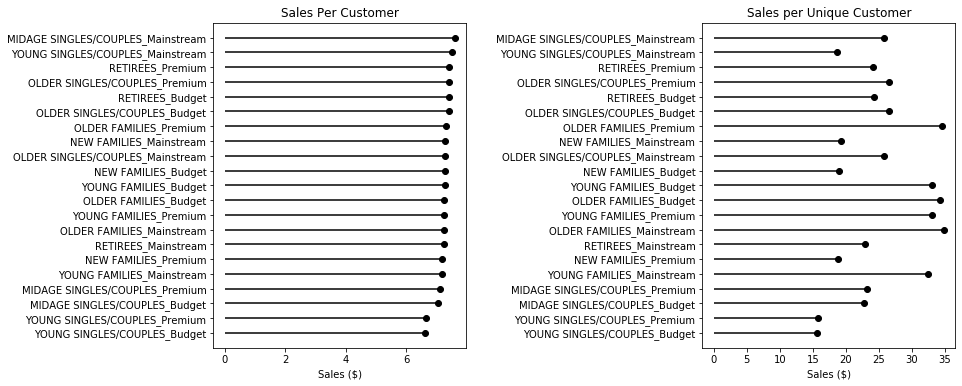

In [45]:
fig = plt.figure(figsize=(14,6))
ax1 = plt.subplot(121)
ax1.hlines(life_prem_pc['Group'], xmin=0, xmax=life_prem_pc.SALES_PER_C)
ax1.plot(life_prem_pc.SALES_PER_C, life_prem_pc['Group'], "o", color='black')
plt.title('Sales Per Customer')
plt.xlabel('Sales ($)')

ax2 = plt.subplot(122)
ax2.hlines(life_prem_pc['Group'], xmin=0, xmax=life_prem_pc.SALES_PER_UC)
ax2.plot(life_prem_pc.SALES_PER_UC, life_prem_pc['Group'], "o", color='black')
plt.xlabel('Sales ($)')
plt.title('Sales per Unique Customer')

fig.tight_layout(pad=3.0)
plt.show()

## Total Qunatity Purchased per Customer and per Unique Customer

In [46]:
life_prem_pc['QTY_PER_C'] = life_prem_pc['PROD_QTY']/life_prem_pc['TXN_ID']
life_prem_pc['QTY_PER_UC'] = life_prem_pc['PROD_QTY']/life_prem_pc['Count']
life_prem_pc = life_prem_pc.sort_values('QTY_PER_C')

In [47]:
life_prem_pc.head()

,LIFESTAGE,PREMIUM_CUSTOMER,Count,TOT_SALES,PROD_QTY,TXN_ID,Group,SALES_PER_C,SALES_PER_UC,QTY_PER_C,QTY_PER_UC
11,YOUNG SINGLES/COUPLES,Budget,3675,57622.40,15689,8687,YOUNG SINGLES/COUPLES_Budget,6.633176,15.679565,1.806032,4.269116
7,YOUNG SINGLES/COUPLES,Premium,2499,39347.90,10687,5917,YOUNG SINGLES/COUPLES_Premium,6.649975,15.745458,1.806152,4.276511
20,YOUNG SINGLES/COUPLES,Mainstream,7930,148337.20,36509,19705,YOUNG SINGLES/COUPLES_Mainstream,7.527896,18.705826,1.852778,4.603909
2,NEW FAMILIES,Budget,1092,20716.05,5282,2847,NEW FAMILIES_Budget,7.276449,18.970742,1.855286,4.836996
1,NEW FAMILIES,Mainstream,834,16078.00,4097,2207,NEW FAMILIES_Mainstream,7.285002,19.278177,1.856366,4.912470


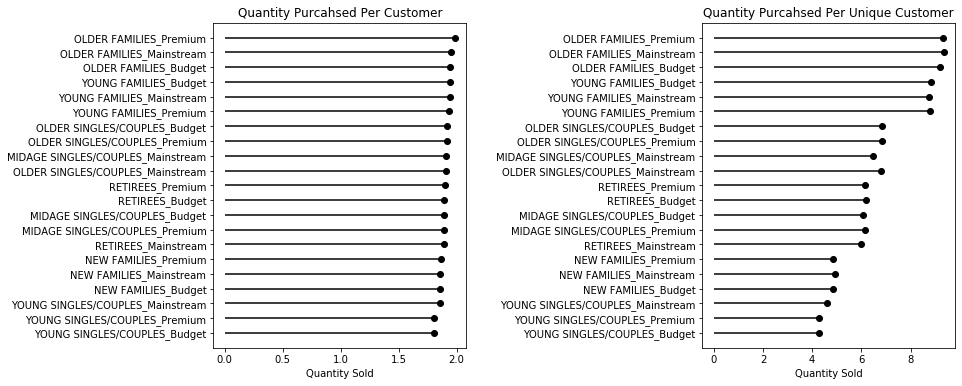

In [48]:
fig = plt.figure(figsize=(14,6))
ax1 = plt.subplot(121)
ax1.hlines(life_prem_pc['Group'], xmin=0, xmax=life_prem_pc.QTY_PER_C)
ax1.plot(life_prem_pc.QTY_PER_C, life_prem_pc['Group'], "o", color='black')
plt.title('Quantity Purcahsed Per Customer')
plt.xlabel('Quantity Sold')

ax2 = plt.subplot(122)
ax2.hlines(life_prem_pc['Group'], xmin=0, xmax=life_prem_pc.QTY_PER_UC)
ax2.plot(life_prem_pc.QTY_PER_UC, life_prem_pc['Group'], "o", color='black')
plt.xlabel('Quantity Sold')
plt.title('Quantity Purcahsed Per Unique Customer')

fig.tight_layout(pad=3.0)
plt.show()

## Number of Unique Customers in Each Segment

Text(0.5, 0, 'Number of Unique Customers')

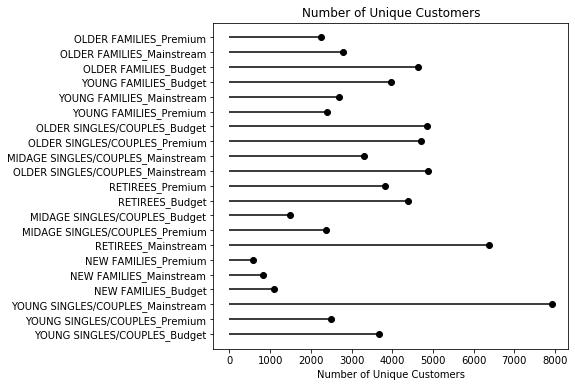

In [49]:
fig = plt.figure(figsize=(14,6))
ax1 = plt.subplot(121)
ax1.hlines(life_prem_pc['Group'], xmin=0, xmax=life_prem_pc.Count)
ax1.plot(life_prem_pc.Count,life_prem_pc['Group'], "o", color='black')
plt.title('Number of Unique Customers')
plt.xlabel('Number of Unique Customers')

## Price Paid Per Quantity Per Unique Customer

In [50]:
alldat['PRICE_PER_UNIT'] = alldat['TOT_SALES']/alldat['PROD_QTY'] # get price per unit
# get price per unit of each customer then groupby lifestage and premium_customer to get average per group
price_per_unit = alldat.groupby('LYLTY_CARD_NBR').agg({'PRICE_PER_UNIT':'mean'}).reset_index().merge(alldat[['LYLTY_CARD_NBR','LIFESTAGE','PREMIUM_CUSTOMER']], on='LYLTY_CARD_NBR').groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'PRICE_PER_UNIT':'mean'}).reset_index().sort_values('PRICE_PER_UNIT')
price_per_unit['Group'] = price_per_unit['LIFESTAGE'] + '_' + price_per_unit['PREMIUM_CUSTOMER']

In [51]:
price_per_unit.head()

,LIFESTAGE,PREMIUM_CUSTOMER,PRICE_PER_UNIT,Group
18,YOUNG SINGLES/COUPLES,Budget,3.644112,YOUNG SINGLES/COUPLES_Budget
20,YOUNG SINGLES/COUPLES,Premium,3.654149,YOUNG SINGLES/COUPLES_Premium
8,OLDER FAMILIES,Premium,3.702489,OLDER FAMILIES_Premium
16,YOUNG FAMILIES,Mainstream,3.709075,YOUNG FAMILIES_Mainstream
7,OLDER FAMILIES,Mainstream,3.723238,OLDER FAMILIES_Mainstream


Text(0.5, 0, 'Price Per Qty ($)')

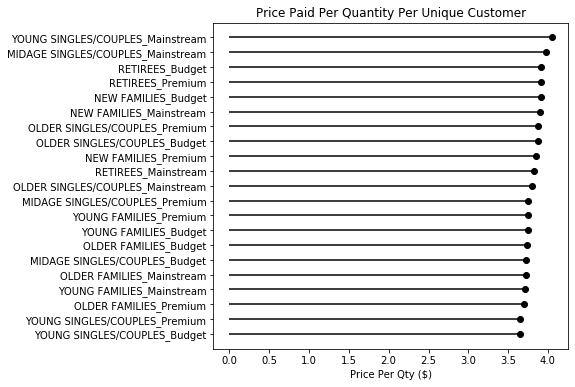

In [52]:
fig = plt.figure(figsize=(14,6))
ax1 = plt.subplot(121)
ax1.hlines(price_per_unit['Group'], xmin=0, xmax=price_per_unit.PRICE_PER_UNIT)
ax1.plot(price_per_unit.PRICE_PER_UNIT,price_per_unit['Group'], "o", color='black')
plt.title('Price Paid Per Quantity Per Unique Customer')
plt.xlabel('Price Per Qty ($)')

## Market Based

In [53]:
basket = (alldat[(alldat['LIFESTAGE']=='YOUNG SINGLES/COUPLES') & (alldat['PREMIUM_CUSTOMER']=='Mainstream')]
        .groupby(['LYLTY_CARD_NBR','Brand'])['PROD_QTY']
        .sum().unstack().reset_index().fillna(0)
        .set_index('LYLTY_CARD_NBR'))

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets

Brand,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,Grain,Infuzions,Infzns,...,Natural,Pringles,RRD,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,WW
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,,
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1010,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1018,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1020,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1060,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2330041,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2330321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.103657,(Cobs)
1,0.259899,(Doritos)
2,0.078689,(Grain)
3,0.111980,(Infuzions)
4,0.386507,(Kettle)
5,0.255738,(Pringles)
6,0.102018,(RRD)
7,0.207818,(Smiths)
8,0.135813,(Thins)
9,0.105675,(Tostitos)


In [55]:
rules = association_rules(frequent_itemsets, metric="lift")
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Doritos),(Kettle),0.259899,0.386507,0.089786,0.345463,0.893809,-0.010667,0.937294
1,(Kettle),(Doritos),0.386507,0.259899,0.089786,0.232300,0.893809,-0.010667,0.964050
2,(Pringles),(Kettle),0.255738,0.386507,0.091299,0.357002,0.923663,-0.007546,0.954113
3,(Kettle),(Pringles),0.386507,0.255738,0.091299,0.236215,0.923663,-0.007546,0.974440
4,(Smiths),(Kettle),0.207818,0.386507,0.077175,0.371359,0.960809,-0.003148,0.975904
